# Seattle Airbnb Analysis (CRISP-DM) - Business Requirements
This project is investigating some Data from Airbnb homes for Seattle, WA-USA. In this project, we will use the data to answer some crucial questions and get a better understanding of the elements of the data and make some useful insights. The purpose of this project is to learn, practice, and improve Data Processing skills.

## Busniess Understanding
According to the Data we have in this project, we will try to learn more about the data provided and answer the questions that we find intresting as follows ?
1. Which are the most common styles of Airbnb houses / apartments?
2. What are the zipcodes with high number of listings?
3. What are the price trends in each month?



In [1]:
#Importing assets & necessary libraries as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Loading the required Data
cal_df = pd.read_csv('calendar.csv')
list_df= pd.read_csv('listings.csv')
rev_df = pd.read_csv('reviews.csv')

## Data Understanding

In [3]:
#Undersatding the number of columns and rows in each Data set
print("Calender dataset contain {} rows and {} columns".format(cal_df.shape[0], cal_df.shape[1]))
print("listings dataset contain {} rows and {} columns".format(list_df.shape[0], list_df.shape[1]))
print("listings dataset contain {} rows and {} columns".format(rev_df.shape[0], rev_df.shape[1]))

Calender dataset contain 1393570 rows and 4 columns
listings dataset contain 3818 rows and 92 columns
listings dataset contain 84849 rows and 6 columns


In [4]:
cal_df.head(n=10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [5]:
cal_df.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [6]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
list_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
rev_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
rev_df.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [12]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Data Preparation

### Answer1: Finding the most common houses / appartments in Seattle

In [13]:
# convert 'available' into binary so we can use it in the calculations
cal_df['available'] = cal_df['available'].map(lambda available: 1 if available == 't' else 0)

#Grouping the homes based on the residency  
resd = cal_df[['listing_id', 'available']].groupby('listing_id').mean()
resd['residency'] = 1 - resd['available']
resd.drop(['available'], axis = 1, inplace=True)
resd['id'] = resd.index

In [14]:
resd.head()

,residency,id
listing_id,,
3335,0.153425,3335
4291,0.000000,4291
5682,0.153425,5682
6606,0.000000,6606
7369,0.854795,7369


In [15]:
#finding information about residency
resd.describe()

,residency,id
count,3818.000000,3.818000e+03
mean,0.329390,5.550111e+06
std,0.347322,2.962660e+06
min,0.000000,3.335000e+03
25%,0.013699,3.258256e+06
50%,0.156164,6.118244e+06
75%,0.660274,8.035127e+06
max,1.000000,1.034016e+07


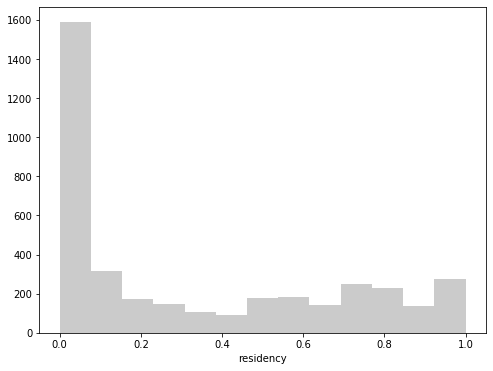

In [16]:
#plotting the data to find out the busy and occupied houses
plt.figure(figsize=(8,6))
sb.distplot(resd['residency'], color= sb.color_palette()[7], kde=False)
plt.show()

In [17]:
#We will assume that rooms with residency more than or equal 80 % are popular.
pop_identifer = 0.85

data = pd.merge(resd, list_df, how='inner', left_on='id', right_on='id')

In [18]:
data.head()

,residency,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.153425,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,0.000000,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,0.153425,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,0.000000,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,0.854795,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


In [19]:
#Creating a function to draw plots based on the data value if it's float or not
def comparePlot(feat):
    
    plt.figure(figsize=(8,6))
        
    # if not float, draw bar plot
    if data[feat].dtype != np.float:
        # build a tempary DataFrame for using seaborn easily
        # includes 3 columns: occupancy, popularity and index
        cnt_popular = data[data['residency'] >= pop_identifer][feat].value_counts()
        cnt_unpopular = data[data['residency'] < pop_identifer][feat].value_counts()
        fre_popular = pd.DataFrame(cnt_popular / sum(cnt_popular))
        fre_popular['popularity'] = 'Popular'
        fre_popular['index'] = fre_popular.index
        fre_unpopular = pd.DataFrame(cnt_unpopular / sum(cnt_unpopular))
        fre_unpopular['popularity'] = 'Unpopular'
        fre_unpopular['index'] = fre_unpopular.index
        
       
        plot_data = pd.concat([fre_popular, fre_unpopular], ignore_index=True)
        sb.barplot(x='index', y=feat, hue='popularity', data=plot_data, palette='muted')
        plt.xticks(rotation='vertical')
        plt.legend(loc=1)
    
    # if float, draw kde line
    else:
        sb.kdeplot(data[feat][data['residency'] >= pop_identifer], color='blue')
        sb.kdeplot(data[feat][data['residency'] < pop_identifer], color='m')
        plt.legend(['Popular', 'Unpopular'], loc=1)
    
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    
    plt.show()

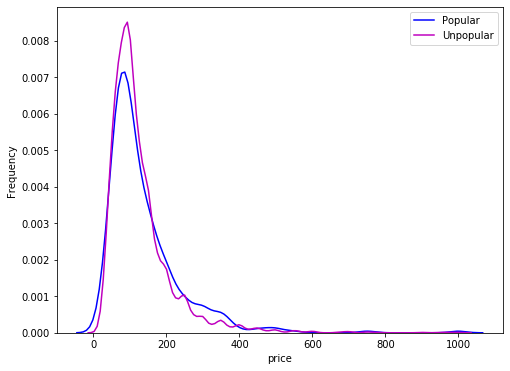

In [20]:
#Compare price
data['price'] = data['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')
comparePlot('price')

We can notice from the digram above that the popular houses have slight differences in price.

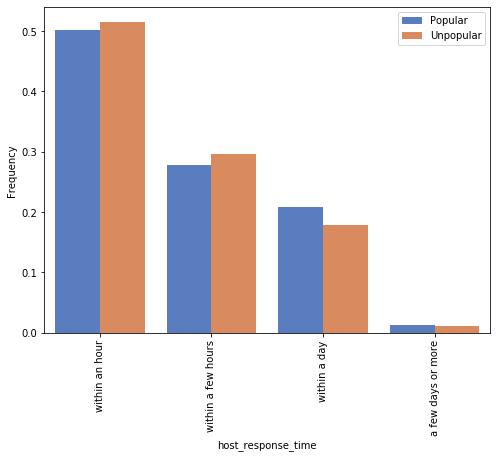

In [21]:
# host response time
comparePlot('host_response_time')

We noticed that the popular houses still response fast almost the same as the unpopular ones

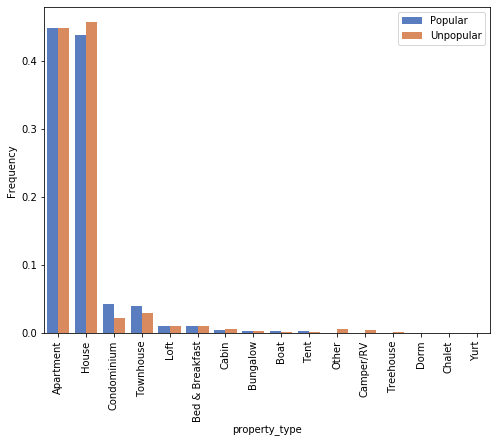

In [22]:
# property type
comparePlot('property_type')

From the above digram we see that the most popular type is the appartment it has the most frequency

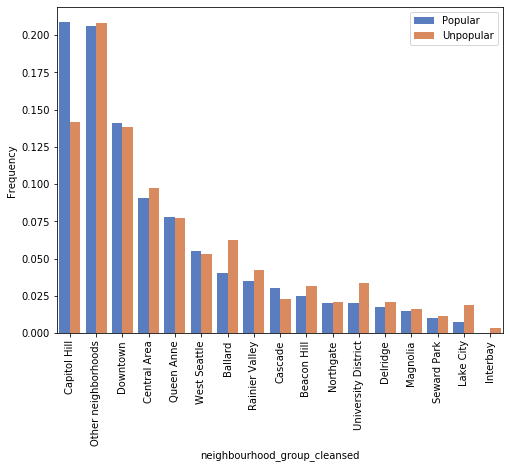

In [23]:
# neighbourhood
comparePlot('neighbourhood_group_cleansed')

Capital Hill is the most popular area.

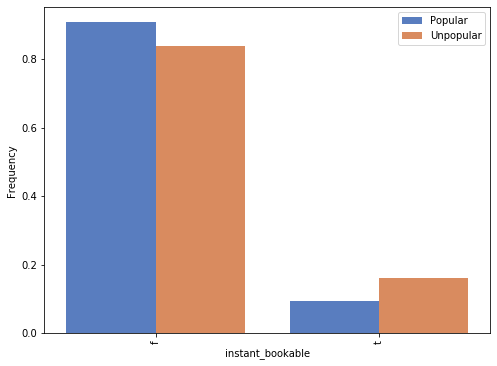

In [24]:
# booking
comparePlot('instant_bookable')

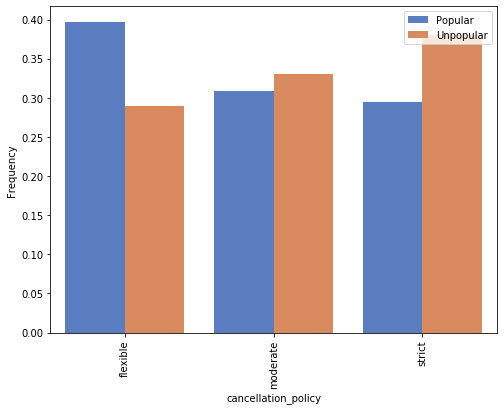

In [25]:
# cancellation policy
comparePlot('cancellation_policy')

### Answer2: 2. finding the zipcodes with high number of listings

In [26]:
def format_price(data):
    """"
    This function removes $ sign from the value, and converts it to a float
    Parameters: dataset of interest
    Returns: Float value for price
    """
    data.price = data.price.str.lstrip('$').str.replace(',', '').astype('float')

def format_date(data):
    """"
    This function formats date columns
    Parameters: dataset of interest
    Returns: formatted date
    """
    data.date = pd.to_datetime(data.date)

In [27]:
format_price(cal_df)

In [28]:
format_date(cal_df)

In [29]:
format_price(list_df)

In [30]:
format_date(rev_df)

In [31]:
#zipcode count
zipcode_count = list_df.zipcode.value_counts()
zipcode_count

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

In [32]:
list_df.shape

(3818, 92)

In [33]:
#defining zip codes with low number of houses to be dropped
low_cnts_zip_codes = ['98118', '98119', '98116', '98104', '98125', '98199', '98126', '98106', '98108', '98133', '98136',
                      '98177', '98178', '98134', '98146', '98122', '99\n98122']

In [34]:
#Dropping the zip codes with lower values
list_df.drop(list_df[list_df.zipcode.isin(low_cnts_zip_codes)].index, inplace=True)

In [35]:
list_df.shape

(2453, 92)

In [36]:
list_df.zipcode.value_counts()

98103    394
98102    339
98105    225
98109    202
98101    201
98144    200
98121    196
98107    180
98115    178
98112    167
98117    164
Name: zipcode, dtype: int64

The above zip codes who have more number of homes

In [37]:
list_df.groupby(['property_type','room_type','zipcode']).agg({'zipcode':'count',
                  'price':'mean','accommodates':'mean','bedrooms':'mean','bathrooms':'mean'}).round(0).rename(columns={
    'zipcode': 'listing_count'})


listing_count  price  accommodates  \
property_type room_type       zipcode                                       
Apartment     Entire home/apt 98101              163  167.0           4.0   
                              98102              185  124.0           3.0   
                              98103              120  117.0           3.0   
                              98105               83  106.0           3.0   
                              98107               48  115.0           3.0   
...                                              ...    ...           ...   
Townhouse     Private room    98117                3   52.0           2.0   
                              98144                9   81.0           2.0   
              Shared room     98105                1   40.0           2.0   
                              98115                1   33.0           1.0   
Treehouse     Entire home/apt 98102                1  200.0           2.0   

                                       bedrooms  bathrooms  
property_type room_type       zipcode                       
Apartment     Entire home/apt 98101         1.0        1.0  
                              98102         1.0        1.0  
                              98103         1.0        1.0  
                              98105         1.0        1.0  
                              98107         1.0        1.0  
...                                         ...        ...  
Townhouse     Private room    98117         1.0        1.0  
                              98144         1.0        1.0  
              Shared room     98105         1.0        2.0  
                              98115         1.0        2.0  
Treehouse     Entire home/apt 98102         0.0        1.0  

[152 rows x 5 columns]

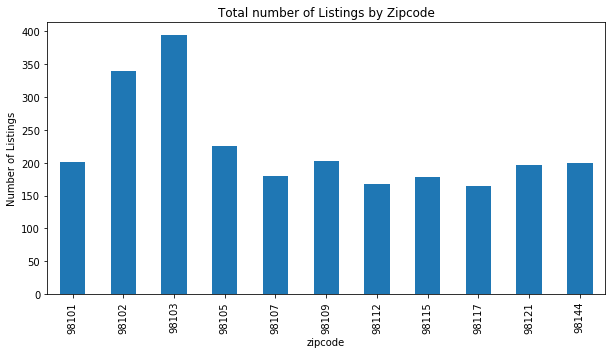

In [38]:
Listings_per_zipcode= list_df.groupby('zipcode').zipcode.count()

plt.figure(figsize=(10,5));
Listings_per_zipcode.plot(kind='bar');
plt.xlabel('zipcode')
plt.ylabel('Number of Listings')
plt.title('Total number of Listings by Zipcode');

According to the digram above we noticed that zipcode 98103 has the highest number of listings followed by 98102.

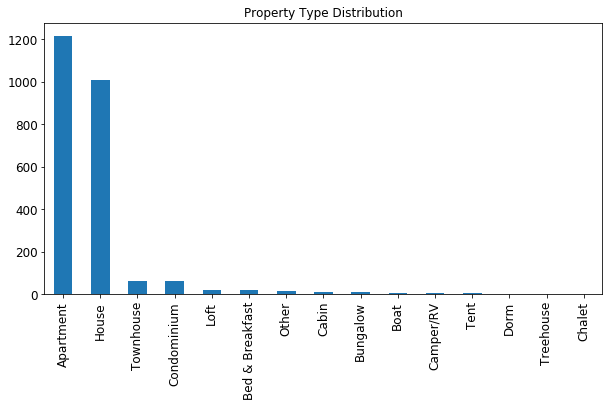

In [39]:
list_df.property_type.value_counts().plot.bar(figsize=(10, 5), fontsize = 12, title = 'Property Type Distribution');

In [40]:
list_df.groupby(['property_type']).agg({'price':'mean','zipcode':
                                        'count'}).round(0).sort_values(['zipcode'],ascending=False).rename(columns={
    'zipcode': 'listing_count'})

,price,listing_count
property_type,,
Apartment,125.0,1214
House,133.0,1004
Condominium,159.0,65
Townhouse,129.0,65
Loft,127.0,22
Bed & Breakfast,114.0,20
Other,103.0,14
Cabin,123.0,11
Bungalow,97.0,10


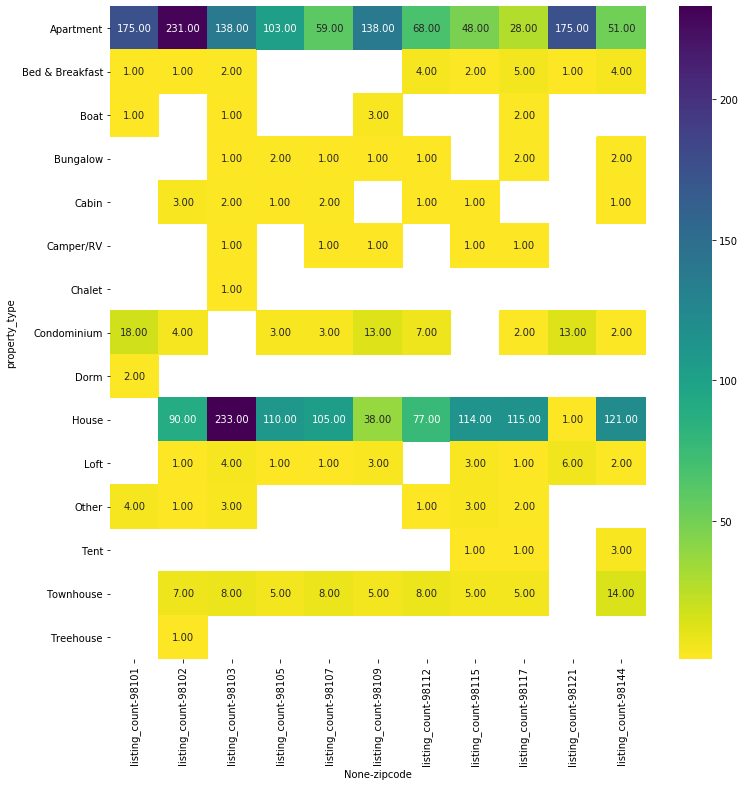

In [41]:
#Finding out the patterns between zip code and property type
plt.figure(figsize=(12,12));
sb.heatmap(list_df.groupby(['property_type',
                                 'zipcode']).agg({'zipcode':'count'}).rename(columns={
    'zipcode': 'listing_count'}).unstack(),annot=True, fmt=".2f", cmap='viridis_r');

Based on the above Heatmap,  appartment came in top and has more numbers which means they are the most common type of listings for all the zipcodes contributing to more than 70% of the overall listings. Next popular property type is housees.

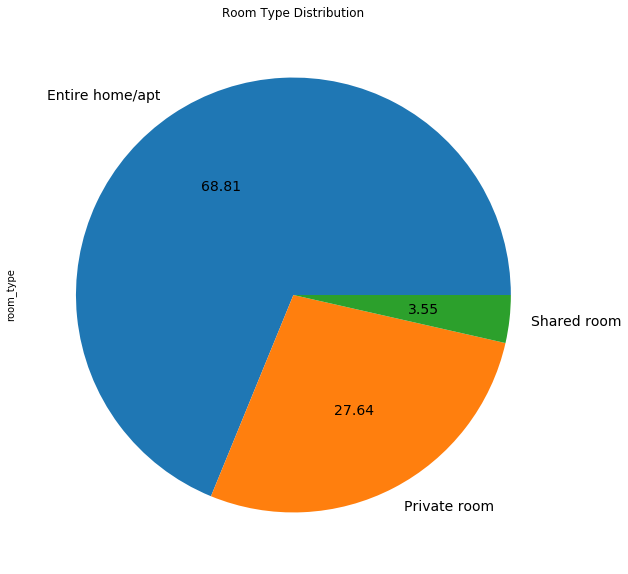

In [42]:
list_df.room_type.value_counts().plot.pie(figsize=(10, 10), fontsize = 14, autopct = '%.2f',
                                              title = 'Room Type Distribution');

From this pie chart we can understand that people tend to go for Entire home or apartment as they form 68.81% from the total number, followed by Private room which is 27.64% and the least common is the shared room which is almost 3.55%

In [43]:
list_df.groupby(['room_type']).agg({
    'price':'mean','zipcode':'count'}).round(0).sort_values(['zipcode'],
                                                            ascending=False).rename(columns={'zipcode': 'listing_count'})

,price,listing_count
room_type,,
Entire home/apt,155.0,1684
Private room,76.0,675
Shared room,47.0,87


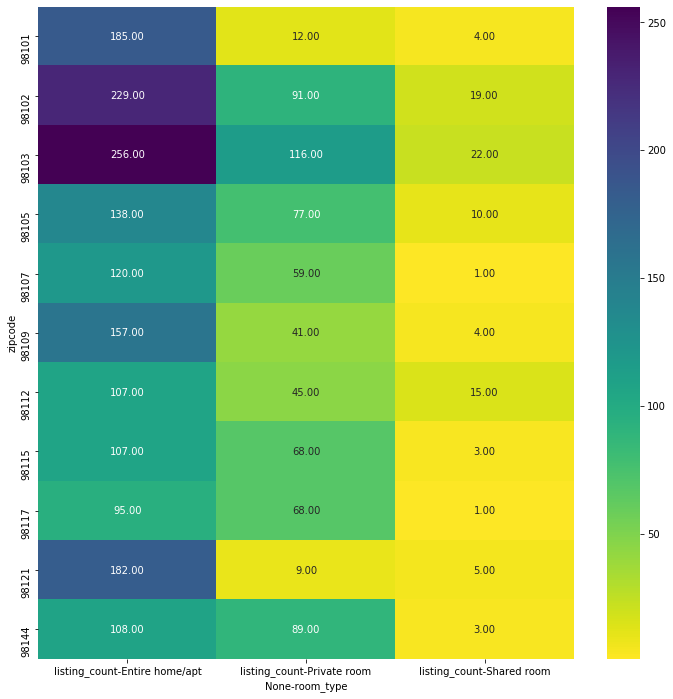

In [44]:
plt.figure(figsize=(12,12));
sb.heatmap(list_df.groupby([
    'zipcode', 'room_type']).agg({'zipcode':'count'}).rename(columns={
    'zipcode': 'listing_count'}).unstack(),annot=True, fmt=".2f", cmap ='viridis_r');

From the pervious heatmap, we are able to determine the zip codes wih more number of houses also their types, as follows:
98103, 98102, 98101, 98121, 98109 they're soerted in a descinding order respectivly, they are all home/apartment type.
for the private room type we can find out that 98103 is the most common zip code with private rooms. also the top in shared rooms

### Answer3: finding the price trends in seattle

In [45]:
#Clean Data (Format the price)

def format_price2(df):
    """Format 'price' column of a DataFrame and create a new column 'price_val'
    
    df -- DataFrame in which to format price"""
    
    # remove $ sign
    df['price_val'] = df['price'].str[1:]

    # remove commas
    df['price_val'] = df['price_val'].str.replace(',', '')

    # convert to numeric
    df['price_val'] = pd.to_numeric(df['price_val'])

In [46]:
#Clean and prepare the Data
def clean_calendar_df(df):
    """Drop missing rows from DataFrame, convert date column type,
    and create new column: price_val by formatting price column.
    
    df -- DataFrame to clean"""
    
    # drop any rows with missing values
    df.dropna(inplace=True)

    # convert type of 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # create new column 'price_val' which is a formatted
    # version of column 'price'
    format_price2(df)

In [47]:
cal_df = pd.read_csv('calendar.csv')
clean_calendar_df(cal_df)

calendar_std_df = cal_df.groupby(['listing_id']).std().dropna()

calendar_variance_df = calendar_std_df[calendar_std_df['price_val'] > 0]
listings_with_variance = list(calendar_variance_df.index)

In [48]:
#Now we will calculate the price for each month

def get_prices_per_month(df, listing_id):
    """Returns mean prices for each month of a listing.
    It returns a list of 12 mean prices, 
    one value for each month of the year.
    
    df -- DataFrame from which to retrieve prices
    listing_id -- Id of Listing for which to return mean prices"""
    mean_prices = np.zeros(12)
    
    for month in range(1, 13):
        prices_df = df[df['listing_id'] == listing_id]
        prices_df = prices_df[prices_df['date'].dt.month == month]
        mean_prices[month - 1] = prices_df['price_val'].mean()

    return mean_prices

In [49]:
def normalize(prices):
    """Normalize prices between 0 - 1.
    
    prices -- Prices Data Structure """
    
    minimum = prices.min()
    maximum = prices.max()
    
    return (prices - minimum) / (maximum - minimum)

In [50]:
def is_listing_avail_all_year(df, listing_id):
    """Returns true if listing is available year round.
    
    df -- DataFrame
    listing_id -- Listing Id
    """
    
    months = list(range(1, 13)) # [1, 2, 3, .. 12]
    list_df = df[df['listing_id'] == listing_id]
    return set(list_df['date'].dt.month.unique()) == set(months)

In [51]:
prices = np.zeros(12)
num_listings_analyzed = 0

for listing_id in listings_with_variance:
    if not is_listing_avail_all_year(cal_df, listing_id):
        continue

    prices_listing = get_prices_per_month(cal_df, listing_id)
    prices_listing_normalized = normalize(prices_listing)
    prices = prices + prices_listing_normalized
    num_listings_analyzed = num_listings_analyzed + 1

prices = prices / num_listings_analyzed

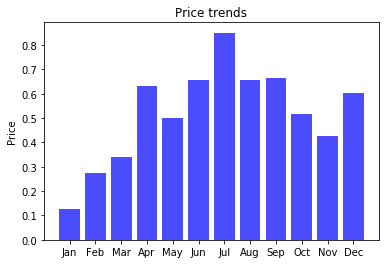

In [58]:
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
months_pos = np.arange(len(months))

plt.bar(months_pos, prices, align='center', alpha=0.7, color ='blue')
plt.xticks(months_pos, months)
plt.ylabel('Price')
plt.title('Price trends')

plt.show()

From the previous bar chart, we noticed that July has the highest price due to vacations and the beginning of the summer